# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:17<00:00, 3.47KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

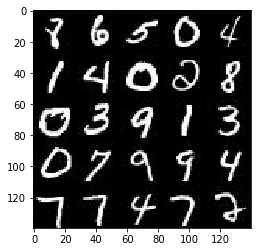

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

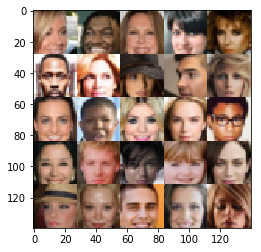

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/Users/sunny/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


TensorFlow Version: 1.4.0


/Users/sunny/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [133]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels])
    z = tf.placeholder(tf.float32, [None,z_dim])
    learning_rate = tf.placeholder(tf.float32, None)

    return real_input, z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [141]:
def discriminator(images, reuse=False, alpha = 0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # Input layer is 28x28x1
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training = True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [142]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2, training=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    # Fixed the line below for reuse=not is_train with https://discussions.udacity.com/t/dlnd-face-generation-generator-issue/342313
    with tf.variable_scope('generator', reuse=not is_train):
        # First layer is a fully connected layer
        fc1 = tf.layers.dense(z, 3*3*512)
        fc1 = tf.reshape(fc1, (-1, 3, 3, 512))
        fc1 = tf.layers.batch_normalization(fc1, training=is_train)
        fc1 = tf.maximum(alpha*fc1, fc1)
#         print(fc1.shape)
        # 3x3x512

        conv2 = tf.layers.conv2d_transpose(fc1, 256, 5, strides=1)
        conv2 = tf.layers.batch_normalization(conv2, training=is_train)
        conv2 = tf.maximum(alpha * conv2, conv2)
#         print(conv2.shape)
        # 7x7x256

        conv3 = tf.layers.conv2d_transpose(conv2, 128, 4, strides=2, padding='same')
        conv3 = tf.layers.batch_normalization(conv3, training=is_train)
        conv3 = tf.maximum(alpha * conv3, conv3)
#         print(conv3.shape)
        # 14x14x128

        logits = tf.layers.conv2d_transpose(conv3, out_channel_dim, 4, strides=2, padding='same')
        # 28x28xout_channel_dim
#         print(logits.shape)

        output = tf.tanh(logits)
    
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [134]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model,reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [129]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_variables = tf.trainable_variables()
    d_variables = [variable for variable in t_variables if variable.name.startswith('discriminator')]
    g_variables = [variable for variable in t_variables if variable.name.startswith('generator')]
    
    # Now we optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_training_operation = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_variables)
        g_training_operation = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_variables)
        
    
    return d_training_operation, g_training_operation


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [130]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [146]:
import pickle as pkl

def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    if data_image_mode == 'RGB':
        out_channel_dim = 3
    else:
        out_channel_dim = 1
        
    real_input, z , learning_rate_= model_inputs(data_shape[1], data_shape[2], out_channel_dim, z_dim)
    
    # Discriminator and Generator losses
    d_loss, g_loss = model_loss(real_input, z, out_channel_dim)
    
    # Optimizers
    d_training_operation, g_training_operation = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    samples, losses = [], []
    steps = 0
    print_every = 10
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
#                 batch_images = batch_images * 2 - 1
                batch_images = batch_images * 2
                
                # Random noise sampling for generator
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # running the optimizers
                _ = sess.run(d_training_operation, feed_dict={real_input: batch_images, z: batch_z})
                _ = sess.run(g_training_operation, feed_dict={z: batch_z, real_input: batch_images})
                
                if steps % print_every == 0:
                    train_loss_d = sess.run(d_loss, {z: batch_z, real_input: batch_images})
                    train_loss_g = g_loss.eval({z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, 10, z, out_channel_dim, data_image_mode)
        
        saver.save(sess, './checkpoints/generator.ckpt')
        
    with open('samples.pkl','wb') as f:
        pkl.dump(samples,f)
        
# References
# https://discussions.udacity.com/t/getting-an-error-when-running-train-function/342133
#               

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.5045... Generator Loss: 42.1072
Epoch 1/2... Discriminator Loss: 28.7858... Generator Loss: 50.1415
Epoch 1/2... Discriminator Loss: 0.6862... Generator Loss: 5.6099
Epoch 1/2... Discriminator Loss: 1.7981... Generator Loss: 5.5837
Epoch 1/2... Discriminator Loss: 0.4107... Generator Loss: 1.8902
Epoch 1/2... Discriminator Loss: 1.0737... Generator Loss: 0.5979
Epoch 1/2... Discriminator Loss: 0.0456... Generator Loss: 21.5232
Epoch 1/2... Discriminator Loss: 0.1218... Generator Loss: 5.7294
Epoch 1/2... Discriminator Loss: 0.1621... Generator Loss: 3.1816
Epoch 1/2... Discriminator Loss: 0.5625... Generator Loss: 3.3166


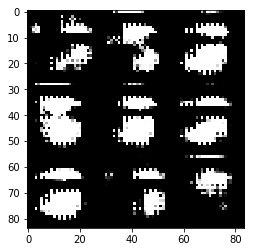

Epoch 1/2... Discriminator Loss: 3.6229... Generator Loss: 0.1835
Epoch 1/2... Discriminator Loss: 0.2403... Generator Loss: 3.4477
Epoch 1/2... Discriminator Loss: 0.0592... Generator Loss: 4.1696
Epoch 1/2... Discriminator Loss: 1.2034... Generator Loss: 6.9206
Epoch 1/2... Discriminator Loss: 5.4912... Generator Loss: 13.4277
Epoch 1/2... Discriminator Loss: 4.7327... Generator Loss: 11.6730
Epoch 1/2... Discriminator Loss: 5.7864... Generator Loss: 0.0214
Epoch 1/2... Discriminator Loss: 1.6237... Generator Loss: 4.7051
Epoch 1/2... Discriminator Loss: 0.7726... Generator Loss: 1.5779
Epoch 1/2... Discriminator Loss: 1.3519... Generator Loss: 0.5948


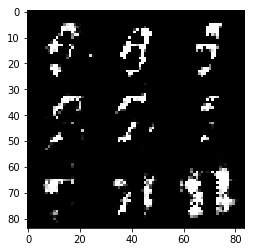

Epoch 1/2... Discriminator Loss: 0.5212... Generator Loss: 1.8542
Epoch 1/2... Discriminator Loss: 1.3940... Generator Loss: 0.5119
Epoch 1/2... Discriminator Loss: 0.6409... Generator Loss: 1.9285
Epoch 1/2... Discriminator Loss: 2.4113... Generator Loss: 0.2201
Epoch 1/2... Discriminator Loss: 1.0122... Generator Loss: 2.4150
Epoch 1/2... Discriminator Loss: 1.1161... Generator Loss: 0.8324
Epoch 1/2... Discriminator Loss: 1.1183... Generator Loss: 1.7932
Epoch 1/2... Discriminator Loss: 1.0419... Generator Loss: 1.8359
Epoch 1/2... Discriminator Loss: 1.1909... Generator Loss: 0.6593
Epoch 1/2... Discriminator Loss: 1.2802... Generator Loss: 0.7711


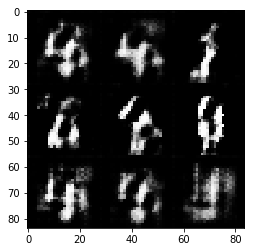

Epoch 1/2... Discriminator Loss: 1.7478... Generator Loss: 0.3088
Epoch 1/2... Discriminator Loss: 0.6704... Generator Loss: 1.8963
Epoch 1/2... Discriminator Loss: 1.0012... Generator Loss: 1.4030
Epoch 1/2... Discriminator Loss: 1.1288... Generator Loss: 1.3411
Epoch 1/2... Discriminator Loss: 1.1839... Generator Loss: 1.3215
Epoch 1/2... Discriminator Loss: 1.2733... Generator Loss: 1.3800
Epoch 1/2... Discriminator Loss: 1.1801... Generator Loss: 0.6876
Epoch 1/2... Discriminator Loss: 1.6496... Generator Loss: 0.3446
Epoch 1/2... Discriminator Loss: 1.1673... Generator Loss: 1.0299
Epoch 1/2... Discriminator Loss: 0.9857... Generator Loss: 1.0452


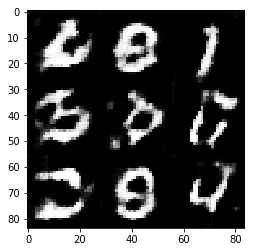

Epoch 1/2... Discriminator Loss: 1.2038... Generator Loss: 0.5734
Epoch 1/2... Discriminator Loss: 1.0980... Generator Loss: 0.6758
Epoch 1/2... Discriminator Loss: 1.3308... Generator Loss: 2.2665
Epoch 1/2... Discriminator Loss: 1.0132... Generator Loss: 1.7895
Epoch 1/2... Discriminator Loss: 1.7519... Generator Loss: 2.8455
Epoch 1/2... Discriminator Loss: 1.0708... Generator Loss: 1.8418
Epoch 2/2... Discriminator Loss: 1.1467... Generator Loss: 0.5948
Epoch 2/2... Discriminator Loss: 1.4517... Generator Loss: 1.7733
Epoch 2/2... Discriminator Loss: 1.2212... Generator Loss: 0.5907
Epoch 2/2... Discriminator Loss: 1.2377... Generator Loss: 0.5503


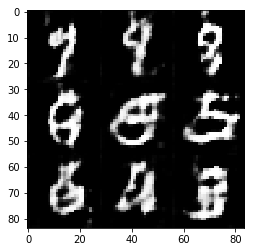

Epoch 2/2... Discriminator Loss: 1.2012... Generator Loss: 1.4628
Epoch 2/2... Discriminator Loss: 0.9722... Generator Loss: 0.8165
Epoch 2/2... Discriminator Loss: 3.2302... Generator Loss: 4.0022
Epoch 2/2... Discriminator Loss: 1.3395... Generator Loss: 1.8628
Epoch 2/2... Discriminator Loss: 1.2112... Generator Loss: 0.5361
Epoch 2/2... Discriminator Loss: 1.3631... Generator Loss: 2.5201
Epoch 2/2... Discriminator Loss: 0.9859... Generator Loss: 0.8194
Epoch 2/2... Discriminator Loss: 0.8928... Generator Loss: 1.6071
Epoch 2/2... Discriminator Loss: 1.2542... Generator Loss: 0.5748
Epoch 2/2... Discriminator Loss: 1.3978... Generator Loss: 0.3763


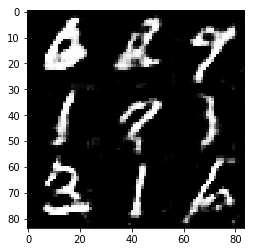

Epoch 2/2... Discriminator Loss: 1.4408... Generator Loss: 1.9703
Epoch 2/2... Discriminator Loss: 1.4823... Generator Loss: 0.3823
Epoch 2/2... Discriminator Loss: 1.2116... Generator Loss: 0.5608
Epoch 2/2... Discriminator Loss: 1.0357... Generator Loss: 0.6989
Epoch 2/2... Discriminator Loss: 2.0838... Generator Loss: 0.2227
Epoch 2/2... Discriminator Loss: 0.7869... Generator Loss: 0.9622
Epoch 2/2... Discriminator Loss: 1.0843... Generator Loss: 0.5599
Epoch 2/2... Discriminator Loss: 1.7456... Generator Loss: 0.2940
Epoch 2/2... Discriminator Loss: 1.5716... Generator Loss: 0.3460
Epoch 2/2... Discriminator Loss: 1.0860... Generator Loss: 1.6742


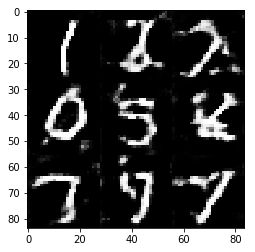

Epoch 2/2... Discriminator Loss: 1.0457... Generator Loss: 0.7253
Epoch 2/2... Discriminator Loss: 0.8062... Generator Loss: 1.4950
Epoch 2/2... Discriminator Loss: 1.0470... Generator Loss: 0.8944
Epoch 2/2... Discriminator Loss: 0.8380... Generator Loss: 1.4334
Epoch 2/2... Discriminator Loss: 1.0746... Generator Loss: 1.0434
Epoch 2/2... Discriminator Loss: 0.9499... Generator Loss: 1.5416
Epoch 2/2... Discriminator Loss: 0.9671... Generator Loss: 1.8904
Epoch 2/2... Discriminator Loss: 0.6412... Generator Loss: 1.2653
Epoch 2/2... Discriminator Loss: 1.0704... Generator Loss: 1.0415
Epoch 2/2... Discriminator Loss: 1.4088... Generator Loss: 0.4492


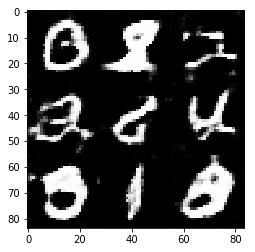

Epoch 2/2... Discriminator Loss: 1.5485... Generator Loss: 0.4087
Epoch 2/2... Discriminator Loss: 0.8358... Generator Loss: 1.1212
Epoch 2/2... Discriminator Loss: 1.8733... Generator Loss: 0.2529
Epoch 2/2... Discriminator Loss: 1.2354... Generator Loss: 0.5402
Epoch 2/2... Discriminator Loss: 1.1656... Generator Loss: 1.8774
Epoch 2/2... Discriminator Loss: 0.9392... Generator Loss: 1.8683
Epoch 2/2... Discriminator Loss: 1.0969... Generator Loss: 0.7728
Epoch 2/2... Discriminator Loss: 1.5907... Generator Loss: 0.3391
Epoch 2/2... Discriminator Loss: 0.9507... Generator Loss: 1.8077
Epoch 2/2... Discriminator Loss: 1.0863... Generator Loss: 1.5428


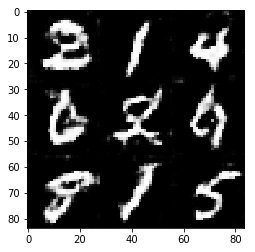

Epoch 2/2... Discriminator Loss: 1.8115... Generator Loss: 2.3423
Epoch 2/2... Discriminator Loss: 0.9708... Generator Loss: 0.9615
Epoch 2/2... Discriminator Loss: 1.5231... Generator Loss: 0.3652


In [148]:
batch_size = 128
z_dim = 100
learning_rate = 0.02
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.3711... Generator Loss: 8.5595
Epoch 1/1... Discriminator Loss: 0.4670... Generator Loss: 4.6851
Epoch 1/1... Discriminator Loss: 0.1400... Generator Loss: 4.5582
Epoch 1/1... Discriminator Loss: 0.3575... Generator Loss: 3.1722
Epoch 1/1... Discriminator Loss: 0.6433... Generator Loss: 1.3517
Epoch 1/1... Discriminator Loss: 0.5282... Generator Loss: 1.7836
Epoch 1/1... Discriminator Loss: 0.2713... Generator Loss: 2.0039
Epoch 1/1... Discriminator Loss: 1.1842... Generator Loss: 0.5935
Epoch 1/1... Discriminator Loss: 0.2207... Generator Loss: 2.0048
Epoch 1/1... Discriminator Loss: 0.5983... Generator Loss: 1.1367


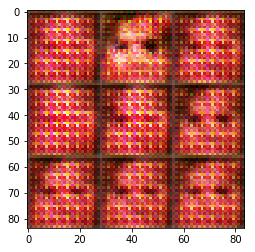

Epoch 1/1... Discriminator Loss: 2.0109... Generator Loss: 0.2046
Epoch 1/1... Discriminator Loss: 0.3713... Generator Loss: 2.1112
Epoch 1/1... Discriminator Loss: 0.7011... Generator Loss: 1.8303
Epoch 1/1... Discriminator Loss: 0.4780... Generator Loss: 1.9840
Epoch 1/1... Discriminator Loss: 0.5550... Generator Loss: 2.1260
Epoch 1/1... Discriminator Loss: 0.5400... Generator Loss: 2.9846
Epoch 1/1... Discriminator Loss: 1.0620... Generator Loss: 4.2875
Epoch 1/1... Discriminator Loss: 0.4941... Generator Loss: 1.7309
Epoch 1/1... Discriminator Loss: 0.2740... Generator Loss: 2.4491
Epoch 1/1... Discriminator Loss: 0.4148... Generator Loss: 3.9303


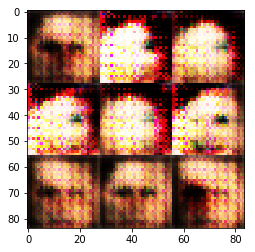

Epoch 1/1... Discriminator Loss: 0.5892... Generator Loss: 1.1772
Epoch 1/1... Discriminator Loss: 1.3343... Generator Loss: 0.3784
Epoch 1/1... Discriminator Loss: 0.7970... Generator Loss: 1.8102
Epoch 1/1... Discriminator Loss: 1.7090... Generator Loss: 3.7977
Epoch 1/1... Discriminator Loss: 0.6768... Generator Loss: 1.1729
Epoch 1/1... Discriminator Loss: 0.9154... Generator Loss: 1.1003
Epoch 1/1... Discriminator Loss: 1.1668... Generator Loss: 0.8120
Epoch 1/1... Discriminator Loss: 1.4670... Generator Loss: 1.2562
Epoch 1/1... Discriminator Loss: 1.7297... Generator Loss: 1.6265
Epoch 1/1... Discriminator Loss: 1.1207... Generator Loss: 0.8588


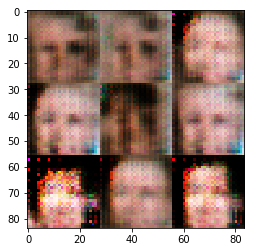

Epoch 1/1... Discriminator Loss: 1.4173... Generator Loss: 0.3957
Epoch 1/1... Discriminator Loss: 1.0664... Generator Loss: 1.3628
Epoch 1/1... Discriminator Loss: 0.5918... Generator Loss: 1.4362
Epoch 1/1... Discriminator Loss: 0.9288... Generator Loss: 1.2200
Epoch 1/1... Discriminator Loss: 1.1937... Generator Loss: 0.7177
Epoch 1/1... Discriminator Loss: 1.1188... Generator Loss: 0.6256
Epoch 1/1... Discriminator Loss: 1.1557... Generator Loss: 0.8935
Epoch 1/1... Discriminator Loss: 0.9989... Generator Loss: 1.1543
Epoch 1/1... Discriminator Loss: 1.3436... Generator Loss: 0.7758
Epoch 1/1... Discriminator Loss: 1.0508... Generator Loss: 0.8460


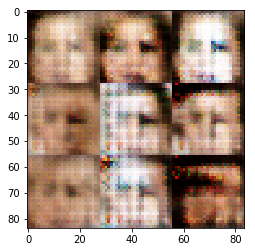

Epoch 1/1... Discriminator Loss: 0.9885... Generator Loss: 1.2387
Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 1.3211
Epoch 1/1... Discriminator Loss: 0.9837... Generator Loss: 1.2381
Epoch 1/1... Discriminator Loss: 0.9889... Generator Loss: 0.7463
Epoch 1/1... Discriminator Loss: 1.1115... Generator Loss: 1.3324
Epoch 1/1... Discriminator Loss: 0.8909... Generator Loss: 1.0294
Epoch 1/1... Discriminator Loss: 1.3212... Generator Loss: 0.8696
Epoch 1/1... Discriminator Loss: 1.0789... Generator Loss: 0.8350
Epoch 1/1... Discriminator Loss: 0.9485... Generator Loss: 1.0871
Epoch 1/1... Discriminator Loss: 1.0987... Generator Loss: 1.7921


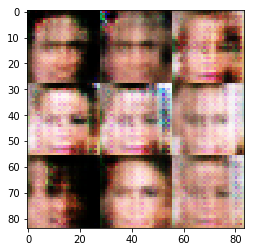

Epoch 1/1... Discriminator Loss: 1.1325... Generator Loss: 1.7454
Epoch 1/1... Discriminator Loss: 0.9408... Generator Loss: 0.8551
Epoch 1/1... Discriminator Loss: 1.1486... Generator Loss: 1.3871
Epoch 1/1... Discriminator Loss: 0.9338... Generator Loss: 0.9568
Epoch 1/1... Discriminator Loss: 1.0640... Generator Loss: 1.4152
Epoch 1/1... Discriminator Loss: 0.9010... Generator Loss: 1.1831
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.9835
Epoch 1/1... Discriminator Loss: 0.9458... Generator Loss: 0.8898
Epoch 1/1... Discriminator Loss: 1.9345... Generator Loss: 3.3232
Epoch 1/1... Discriminator Loss: 1.0779... Generator Loss: 0.9953


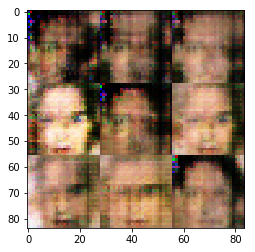

Epoch 1/1... Discriminator Loss: 1.1955... Generator Loss: 1.4874
Epoch 1/1... Discriminator Loss: 1.0907... Generator Loss: 0.8723
Epoch 1/1... Discriminator Loss: 0.9905... Generator Loss: 0.9008
Epoch 1/1... Discriminator Loss: 1.5304... Generator Loss: 2.4396
Epoch 1/1... Discriminator Loss: 1.0649... Generator Loss: 0.9532
Epoch 1/1... Discriminator Loss: 1.1261... Generator Loss: 0.7608
Epoch 1/1... Discriminator Loss: 1.4733... Generator Loss: 0.5476
Epoch 1/1... Discriminator Loss: 1.2362... Generator Loss: 1.1512
Epoch 1/1... Discriminator Loss: 0.9458... Generator Loss: 0.8775
Epoch 1/1... Discriminator Loss: 1.4755... Generator Loss: 0.5358


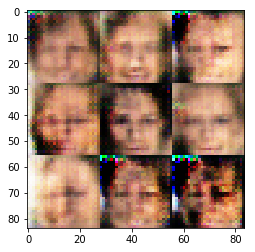

Epoch 1/1... Discriminator Loss: 1.0917... Generator Loss: 0.7307
Epoch 1/1... Discriminator Loss: 0.8616... Generator Loss: 1.3332
Epoch 1/1... Discriminator Loss: 1.9259... Generator Loss: 0.2656
Epoch 1/1... Discriminator Loss: 1.2570... Generator Loss: 0.6964
Epoch 1/1... Discriminator Loss: 1.1268... Generator Loss: 1.2600
Epoch 1/1... Discriminator Loss: 1.0907... Generator Loss: 1.4359
Epoch 1/1... Discriminator Loss: 0.9621... Generator Loss: 1.5397
Epoch 1/1... Discriminator Loss: 0.9954... Generator Loss: 1.1976
Epoch 1/1... Discriminator Loss: 1.0346... Generator Loss: 0.8327


In [150]:
batch_size = 256
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.